In [ ]:
# This reads in csvs of injected and retrieved OPD, tip, and tilt in Fizeau PSFs

# Created 2019 May 30 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#%matplotlib qt

In [2]:
wavel_um = 3.87
PS = 10.7

In [3]:
# OPD variations alone: trial 2

trial2_opd_alone_injected = pd.read_csv("../data/trial2_200102_injected.csv")
trial2_opd_alone_retrieved = pd.read_csv("../data/trial2_200102_retrieved.csv")

# meld them by the filenames
trial2_opd_alone_injected_retrieved = pd.merge(trial2_opd_alone_retrieved,
                                               trial2_opd_alone_injected,
                                               on="filename",
                                               how="inner")

# sort
trial2_opd_alone_injected_retrieved = trial2_opd_alone_injected_retrieved.sort_values(by="filename").reset_index()

In [12]:
# tip variations alone: trial 3

trial3_tip_alone_injected = pd.read_csv("../data/trial3_200102_injected.csv")
trial3_tip_alone_retrieved = pd.read_csv("../data/trial3_200102_retrieved.csv")

# meld them by the filenames
trial3_tip_alone_injected_retrieved = pd.merge(trial3_tip_alone_injected,
                                               trial3_tip_alone_retrieved,
                                               on="filename",
                                               how="inner")

# sort
trial3_tip_alone_injected_retrieved = trial3_tip_alone_injected_retrieved.sort_values(by="filename").reset_index()

In [19]:
# tilt variations alone: trial 4

trial4_tilt_alone_injected = pd.read_csv("../data/trial4_200102_injected.csv")
trial4_tilt_alone_retrieved = pd.read_csv("../data/trial4_200102_retrieved.csv")

# meld them by the filenames
trial4_tilt_alone_injected_retrieved = pd.merge(trial4_tilt_alone_injected,
                                               trial4_tilt_alone_retrieved,
                                               on="filename",
                                               how="inner")

# sort
trial4_tilt_alone_injected_retrieved = trial4_tilt_alone_injected_retrieved.sort_values(by="filename").reset_index()

In [18]:
# OPD, tip, tilt variations simultaneously: trial 1

trial1_opd_tip_tilt_injected = pd.read_csv("../data/trial1_200102_injected.csv")
trial1_opd_tip_tilt_retrieved = pd.read_csv("../data/trial1_200102_retrieved.csv")

# meld them by the filenames
trial1_opd_tip_tilt_injected_retrieved = pd.merge(trial1_opd_tip_tilt_injected,
                                               trial1_opd_tip_tilt_retrieved,
                                               on="filename",
                                               how="inner")

# sort
trial1_opd_tip_tilt_injected_retrieved = trial1_opd_tip_tilt_injected_retrieved.sort_values(by="filename").reset_index()

In [19]:
# (y,x) translation variations alone: trial 5

trial5_opd_tip_tilt_injected = pd.read_csv("../data/trial5_200102_injected.csv")
trial5_opd_tip_tilt_retrieved = pd.read_csv("../data/trial5_200102_retrieved.csv")

# meld them by the filenames
trial5_opd_tip_tilt_injected_retrieved = pd.merge(trial5_opd_tip_tilt_injected,
                                               trial5_opd_tip_tilt_retrieved,
                                               on="filename",
                                               how="inner")

# sort
trial5_opd_tip_tilt_injected_retrieved = trial5_opd_tip_tilt_injected_retrieved.sort_values(by="filename").reset_index()

In [20]:
# OPD, tip, tilt, (y,x) translation variations all simultaneous: trial 6

trial6_opd_tip_tilt_yx_injected = pd.read_csv("../data/trial6_200102_injected.csv")
trial6_opd_tip_tilt_yx_retrieved = pd.read_csv("../data/trial6_200102_retrieved.csv")

# meld them by the filenames
trial6_opd_tip_tilt_yx_injected_retrieved = pd.merge(trial6_opd_tip_tilt_yx_injected,
                                               trial6_opd_tip_tilt_yx_retrieved,
                                               on="filename",
                                               how="right")

# sort
trial6_opd_tip_tilt_yx_injected_retrieved = trial6_opd_tip_tilt_yx_injected_retrieved.sort_values(by="filename").reset_index()

In [8]:
# get quantities onto common convention

# N.b.: the retrieved OPD is with respect to the nearest wavelength-multiple 
# of OPD

def convert_stuff(df_inj_choice_opd,df_inj_choice_tip,df_inj_choice_tilt,
                 df_ret_choice_opd,df_ret_choice_tip,df_ret_choice_tilt,
                 df_ret_time):
    '''
    INPUTS:
    df_inj_choice_opd: dataframe column of injected OPD (ex., df_inj["opd"])
    df_inj_choice_tip: " " for tip
    df_inj_choice_tip: " " for tilt
    df_ret_choice_opd: dataframe column of retrieved OPD (ex., df_ret["opd"])
    df_ret_choice_tip: " " for tip
    df_ret_choice_tip: " " for tilt
    df_ret_time: dataframe column of relative time (in sec.)
    '''

    # injected quantities
    opd_inj_unwrapped = df_inj_choice_opd
    opd_inj_simple_mod = np.mod(df_inj_choice_opd,wavel_um)
    opd_inj_positive_side = np.copy(opd_inj_simple_mod)
    opd_inj_negative_side = np.copy(opd_inj_simple_mod)
    tip_inj_unwrapped = df_inj_choice_tip
    tip_inj_simple_mod = np.mod(df_inj_choice_tip,2*PS)
    tip_inj_positive_side = np.copy(tip_inj_simple_mod)
    tip_inj_negative_side = np.copy(tip_inj_simple_mod)
    tilt_inj_unwrapped = df_inj_choice_tilt
    tilt_inj_simple_mod = np.mod(df_inj_choice_tilt,2*PS)
    tilt_inj_positive_side = np.copy(tilt_inj_simple_mod)
    tilt_inj_negative_side = np.copy(tilt_inj_simple_mod)
    #elapsed_time_inj = np.subtract(df_inj_choice["time"],df_inj_choice["time"][0])

    # retrieved quantities
    opd_ret = df_ret_choice_opd
    tip_ret = df_ret_choice_tip
    tilt_ret = df_ret_choice_tilt
    elapsed_time_ret = np.subtract(df_ret_time,df_ret_time[0])

    # injected OPDs, after wrapping, and within an OPD range of (0, +lambda/2)
    opd_inj_positive_side[
        ~np.logical_and(opd_inj_simple_mod >= 0,opd_inj_simple_mod < wavel_um/2)] = np.nan
    # injected OPDs, after wrapping, and within an OPD range of (-lambda/2, 0)
    opd_inj_negative_side[
        ~np.logical_and(opd_inj_simple_mod >= wavel_um/2,opd_inj_simple_mod < wavel_um)] = np.nan
    # translate the 'negative' side OPDs
    opd_inj_negative_side -= wavel_um

    # injected tip, after wrapping, and within a tilt range of (0, +PS)
    tip_inj_positive_side[
        ~np.logical_and(tip_inj_simple_mod >= 0,tip_inj_simple_mod < PS)] = np.nan
    # injected tips, after wrapping, and within a tip range of (-PS, 0)
    tip_inj_negative_side[
        ~np.logical_and(tip_inj_simple_mod >= PS,tip_inj_simple_mod < 2*PS)] = np.nan
    # translate the 'negative' side tips
    tip_inj_negative_side -= 2*PS

    # injected tilt, after wrapping, and within a tilt range of (0, +PS)
    tilt_inj_positive_side[
        ~np.logical_and(tilt_inj_simple_mod >= 0,tilt_inj_simple_mod < PS)] = np.nan
    # injected tilts, after wrapping, and within a tip range of (-PS, 0)
    tilt_inj_negative_side[
        ~np.logical_and(tilt_inj_simple_mod >= PS,tilt_inj_simple_mod < 2*PS)] = np.nan
    # translate the 'negative' side tilts
    tilt_inj_negative_side -= 2*PS
    
    # combine positive and negative sides, such that finite values replace the 
    # nans in the other
    opd_inj_all = np.copy(opd_inj_positive_side)
    mask_opd = np.isnan(opd_inj_positive_side)
    opd_inj_all[mask_opd] = opd_inj_negative_side[mask_opd]
    
    tip_inj_all = np.copy(tip_inj_positive_side)
    mask_tip = np.isnan(tip_inj_positive_side)
    tip_inj_all[mask_tip] = tip_inj_negative_side[mask_tip]
    
    tilt_inj_all = np.copy(tilt_inj_positive_side)
    mask_tilt = np.isnan(tilt_inj_positive_side)
    tilt_inj_all[mask_tilt] = tilt_inj_negative_side[mask_tilt]
    
    # put stuff into dictionaries
    injected_dict = {"tip": tip_inj_all,"tilt": tilt_inj_all,"opd": opd_inj_all, "elapsed_time": elapsed_time_ret}
    retrieved_dict = {"tip": tip_ret,"tilt": tilt_ret,"opd": opd_ret, "elapsed_time": elapsed_time_ret}
    
    return injected_dict, retrieved_dict

In [20]:
# trial2_opd_alone_injected_retrieved
# trial3_tip_alone_injected_retrieved
# trial4_tilt_alone_injected_retrieved
df_choice = trial4_tilt_alone_injected_retrieved
injected_junk, retrieved_junk = convert_stuff(df_inj_choice_opd = df_choice["opd_injected"],
                     df_inj_choice_tip = df_choice["tip_injected"],
                     df_inj_choice_tilt = df_choice["tilt_injected"],
                     df_ret_choice_opd = df_choice["opd_retrieved"],
                     df_ret_choice_tip = df_choice["tip_retrieved"],
                     df_ret_choice_tilt = df_choice["tilt_retrieved"],
                     df_ret_time = df_choice["time"])

2
21.4
3
10.399999999999999
4
10.399999999999999
5
10.399999999999999
6
10.399999999999999


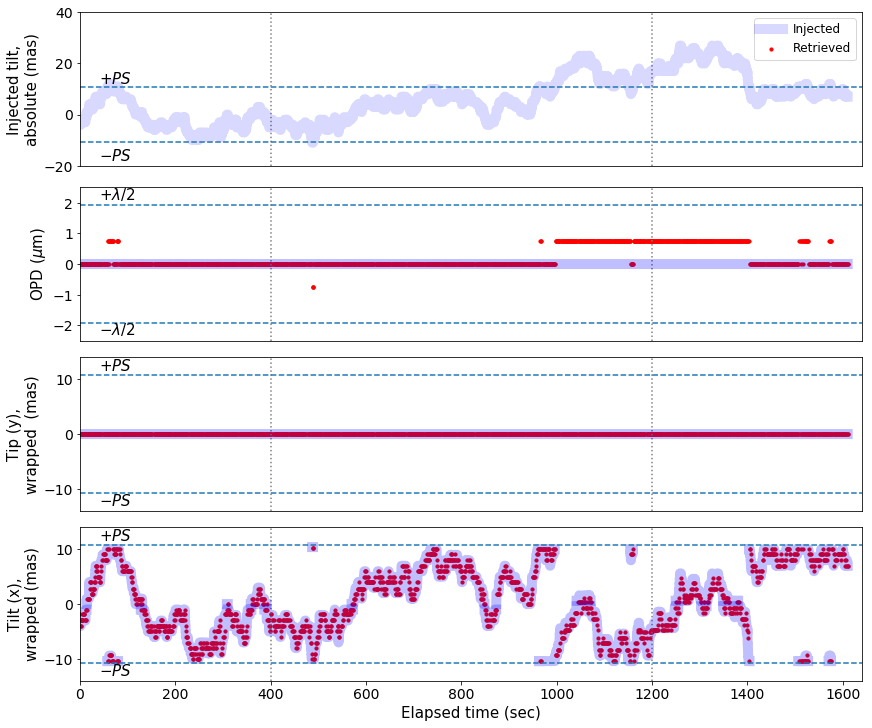

In [40]:
fig = plt.figure(figsize=(12,10), constrained_layout=True)
gs = gridspec.GridSpec(4, 1, figure=fig)

### PLOT NAME
plot_name = "junk.pdf" # make sure to change the choice of dataframe too!

### CHOOSE FIRST PANEL FOR THE UNWRAPPED QUANTITY OF INTEREST
# injected OPD, unwrapped
'''
ax0 = fig.add_subplot(gs[0, :])
ax0.plot(elapsed_time_inj, opd_inj_unwrapped, color = "b", linewidth=10, alpha=0.15)
ax0.axhline(y=wavel_um/2, linestyle = "--")
ax0.axhline(y=-wavel_um/2, linestyle = "--")
ax0.annotate("$+\lambda/2$", xy=(0, 0), xytext=(40, 2.1), textcoords="data")
ax0.annotate("$-\lambda/2$", xy=(0, 0), xytext=(40, -2.3), textcoords="data")
ax0.set_title("Unwrapped injected OPD")
ax0.set_xlim([0,1640])
#ax0.set_ylim([-2.5,2.5])
ax0.set_ylabel("OPD ($\mu$m)")
ax0.set_xlabel("Elapsed time (sec)")
'''

# injected tip, unwrapped
'''
ax0 = fig.add_subplot(gs[0, :])
ax0.plot(elapsed_time_inj, tip_inj_unwrapped, color = "b", linewidth=10, alpha=0.15)
ax0.axhline(y=10.7, linestyle = "--")
ax0.axhline(y=-10.7, linestyle = "--")
ax0.annotate("$+PS$", xy=(0, 0), xytext=(40, 12), textcoords="data")
ax0.annotate("$-PS$", xy=(0, 0), xytext=(40, -18), textcoords="data")
ax0.set_title("Unwrapped injected tip")
ax0.set_xlim([0,1640])
ax0.set_ylim([-20,60])
ax0.set_ylabel("Tip (mas)")
ax0.set_xlabel("Elapsed time (sec)")
'''

# injected tilt, unwrapped
ax0 = fig.add_subplot(gs[0, :])
ax0.axvline(x=400, linestyle=":", color="gray")
ax0.axvline(x=1200, linestyle=":", color="gray")
ax0.plot(elapsed_time_inj, tilt_inj_unwrapped, color = "b", linewidth=10, alpha=0.15, label="Injected")
ax0.scatter(elapsed_time_ret-1000,opd_ret-1000, color="red", s=10, alpha=1, label="Retrieved") # fake; just for legend
ax0.axhline(y=10.7, linestyle = "--")
ax0.axhline(y=-10.7, linestyle = "--")
ax0.annotate("$+PS$", xy=(0, 0), xytext=(40, 12), textcoords="data", fontsize = 15.0)
ax0.annotate("$-PS$", xy=(0, 0), xytext=(40, -18), textcoords="data", fontsize = 15.0)
#ax0.set_title("Unwrapped injected tilt", fontsize = 18.0)
ax0.set_xlim([0,1640])
ax0.set_ylim([-20,40])
ax0.set_ylabel("Injected tilt,\nabsolute (mas)", fontsize = 15.0)
ax0.set_xlabel("Elapsed time (sec)", fontsize = 15.0)
ax0.axes.get_xaxis().set_visible(False)
ax0.tick_params(labelsize=14)
ax0.legend()


### END FIRST PANEL

# OPD
ax1 = fig.add_subplot(gs[1, :])
ax1.axvline(x=400, linestyle=":", color="gray")
ax1.axvline(x=1200, linestyle=":", color="gray")
ax1.plot(elapsed_time_inj, opd_inj_positive_side, color = "b", linewidth=10, alpha=0.25)
ax1.plot(elapsed_time_inj, opd_inj_negative_side, color = "b", linewidth=10, alpha=0.25)
ax1.scatter(elapsed_time_ret,opd_ret, color="red", s=10, alpha=1)
ax1.axhline(y=wavel_um/2, linestyle = "--")
ax1.axhline(y=-wavel_um/2, linestyle = "--")
ax1.annotate("$+\lambda/2$", xy=(0, 0), xytext=(40, 2.1), textcoords="data", fontsize = 15.0)
ax1.annotate("$-\lambda/2$", xy=(0, 0), xytext=(40, -2.3), textcoords="data", fontsize = 15.0)
#ax1.set_title("OPD, wrapped\n(blue = injected; red = retrieved)", fontsize = 18.0)
ax1.set_xlim([0,1640])
ax1.set_ylim([-2.5,2.5])
ax1.set_ylabel("OPD ($\mu$m)", fontsize = 15.0)
ax1.set_xlabel("Elapsed time (sec)", fontsize = 15.0)
ax1.axes.get_xaxis().set_visible(False)
ax1.tick_params(labelsize=14)

# tip
ax2 = fig.add_subplot(gs[2, :])
ax2.axvline(x=400, linestyle=":", color="gray")
ax2.axvline(x=1200, linestyle=":", color="gray")
#ax2.plot(elapsed_time_inj, tip_inj_simple_mod, color = "b", linewidth=10, alpha=0.15)
ax2.plot(elapsed_time_inj, tip_inj_positive_side, color = "b", linewidth=10, alpha=0.25)
ax2.plot(elapsed_time_inj, tip_inj_negative_side, color = "b", linewidth=10, alpha=0.25)
ax2.scatter(elapsed_time_ret, tip_ret, color="red", s=10, alpha=1)
ax2.axhline(y=10.7, linestyle = "--")
ax2.axhline(y=-10.7, linestyle = "--")
ax2.annotate("$+PS$", xy=(0, 0), xytext=(40, 11.5), textcoords="data", fontsize = 15.0)
ax2.annotate("$-PS$", xy=(0, 0), xytext=(40, -13), textcoords="data", fontsize = 15.0)
#ax2.set_title("Tip, wrapped (y)", fontsize = 18.0)
ax2.set_xlim([0,1640])
ax2.set_ylim([-14,14])
ax2.set_ylabel("Tip (y),\nwrapped  (mas)", fontsize = 15.0)
ax2.set_xlabel("Elapsed time (sec)", fontsize = 15.0)
ax2.axes.get_xaxis().set_visible(False)
ax2.tick_params(labelsize=14)

# tilt
ax3 = fig.add_subplot(gs[3, :])
ax3.axvline(x=400, linestyle=":", color="gray")
ax3.axvline(x=1200, linestyle=":", color="gray")
#ax3.plot(elapsed_time_inj, tilt_inj_simple_mod, color = "b", linewidth=10, alpha=0.15)
ax3.plot(elapsed_time_inj, tilt_inj_positive_side, color = "b", linewidth=10, alpha=0.25)
ax3.plot(elapsed_time_inj, tilt_inj_negative_side, color = "b", linewidth=10, alpha=0.25)
ax3.scatter(elapsed_time_ret,tilt_ret, color="red", s=10, alpha=1)
ax3.axhline(y=10.7, linestyle = "--")
ax3.axhline(y=-10.7, linestyle = "--")
ax3.annotate("$+PS$", xy=(0, 0), xytext=(40, 11.5), textcoords="data", fontsize = 15.0)
ax3.annotate("$-PS$", xy=(0, 0), xytext=(40, -13), textcoords="data", fontsize = 15.0)
#ax3.set_title("Tilt, wrapped (x)", fontsize = 18.0)
ax3.set_xlim([0,1640])
ax3.set_ylim([-14,14])
ax3.set_ylabel("Tilt (x),\nwrapped (mas)", fontsize = 15.0)
ax3.set_xlabel("Elapsed time (sec)", fontsize = 15.0)
ax3.tick_params(labelsize=14)

#plt.rcParams.update({'font.size': 12})

#plt.tight_layout()

plt.savefig(plot_name)
plt.show()